In [1]:
import numpy as np
import math

In [20]:
n = 25
y = 10
c = 100
samples = 10000
x = np.random.beta(c+y-1, c+n-y-1, size = samples)
x.sort()

In [21]:
import matplotlib.pyplot as plt

In [22]:
print("mean: {}".format( x.mean()))
print("std: {}".format( x.std()))
for q in [0.05,0.5,0.95]:
    print("{} quantile: {}".format(q ,x[round(samples*q)]))

mean: 0.48895794848365776
std: 0.03385019470595692
0.05 quantile: 0.43317659822567167
0.5 quantile: 0.4885721943423808
0.95 quantile: 0.5451842300132259


## c)

In [467]:
def beta_pmf(theta, alpha, beta, B = None):
    if B is None:
        B = math.exp(math.log(math.factorial(alpha-1)*math.factorial(beta-1)) - math.log(math.factorial(alpha + beta - 1)))
        #print(B)
    return theta**(alpha-1) * (1-theta)**(beta-1) / B

In [468]:
def mc_integrate(f, low = 0, high = 1, samples = 100000):
    u = np.random.uniform(low = low, high = high, size=samples)
    pmf = f(u)
    return np.mean(pmf)

In [469]:
# Check implementation of beta_pmf
mc_integrate(lambda x: beta_pmf(x, alpha = y+1, beta = n-y+1) , samples = 1000000)

0.9988200112055071

In [477]:
# posterior = b1 + b2
f_post_nonnorm = lambda x : beta_pmf(x, y+1, n-y+1) + beta_pmf(x, c+y-1, c+n-y-1)
const = mc_integrate(f_post_nonnorm)
f_post = lambda x : 1/const * f_post_nonnorm(x)

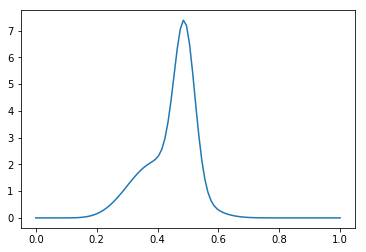

In [478]:
# Visualize it
u = np.linspace(0,1,100)
plt.plot(u, f_post(u))

In [419]:
#### NB: When I dont use the exact B the pdf gives different results:

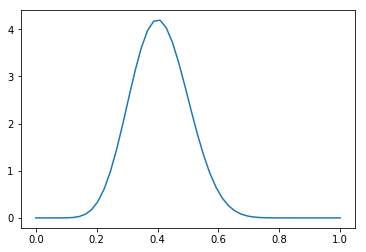

In [473]:
# posterior = b1 + b2
f_post_nonnorm = lambda x : beta_pmf(x, y+1, n-y+1, B=1) + beta_pmf(x, c+y-1, c+n-y-1, B=1)
const = mc_integrate(f_post_nonnorm)
f_post = lambda x : 1/const * f_post_nonnorm(x)
# Visualize it
u = np.linspace(0,1)
plt.plot(u, f_post(u))

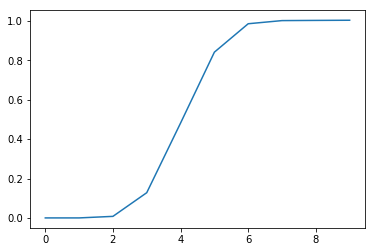

In [474]:
cdf =  lambda x : mc_integrate(lambda t: (t < x)*f_post(t))
# Test CDF
plt.plot([cdf(q/10) for q in list(range(10))])

In [481]:
mean = mc_integrate(lambda x: x*f_post(x), samples = 100000)
stddev = np.sqrt(mc_integrate(lambda x: (x - mean)**2 * f_post(x), samples = 100000))

In [482]:
print("mean: {}".format( mean))
print("std: {}".format( stddev))
for q in [0.05,0.5,0.95]:
    print("{} quantile: {}".format(q ,cdf(q)))

mean: 0.44619048595171296
std: 0.08088161764102864
0.05 quantile: 8.721132808154204e-09
0.5 quantile: 0.7385854713004675
0.95 quantile: 1.0040423079474903


In [389]:
def sample_theta():
    return 0.5 if np.random.rand() > 0.5 else np.random.rand()

In [462]:
theta = sample_theta()

In [463]:
post = theta**y * (1-theta)**(25-10)

In [464]:
post

2.9802322387695312e-08

In [392]:
def sample():
    theta = sample_theta()
    return np.random.binomial(n=25, p = theta, size = 1) == 10

(array([  60.,   50.,   51.,   53.,   44.,   48.,   51.,   45.,   35.,
          51., 1044.,   56.,   52.,   50.,   44.,   68.,   48.,   41.,
          62.,   47.]),
 array([6.53955188e-04, 5.05748443e-02, 1.00495733e-01, 1.50416622e-01,
        2.00337512e-01, 2.50258401e-01, 3.00179290e-01, 3.50100179e-01,
        4.00021068e-01, 4.49941957e-01, 4.99862846e-01, 5.49783735e-01,
        5.99704624e-01, 6.49625514e-01, 6.99546403e-01, 7.49467292e-01,
        7.99388181e-01, 8.49309070e-01, 8.99229959e-01, 9.49150848e-01,
        9.99071737e-01]),
 <a list of 20 Patch objects>)

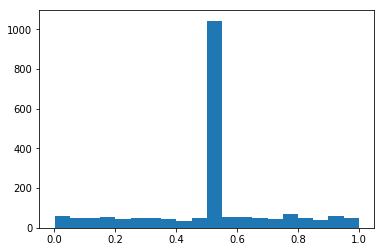

In [391]:
plt.hist(np.array([sample_theta() for _ in range(2000)]), bins = 20)

In [396]:
0.5*1/25

0.02

In [395]:
np.array([sample() for _ in range(10000)]).mean()

0.0684

In [ ]:
# posterior = b1 + b2
f_post_nonnorm = lambda x : beta_pmf(x, y+1, n-y+1) + beta_pmf(x, c+y-1, c+n-y-1)


In [ ]:
const = mc_integrate(f_post_nonnorm)
f_post = lambda x : 1/const * f_post_nonnorm(x)

## a) and b) fully numerical

In [403]:
nonnorm_pdf = lambda theta: theta**(c+y-2) * (1-theta)**(n+c-y-2) * 1

In [404]:
const = mc_integrate(nonnorm_pdf)
norm_pdf = lambda theta: 1/const * nonnorm_pdf(theta)

In [417]:
mc_integrate(lambda x: x*norm_pdf(x))

0.47790381818843775